In [3]:
'''
Load data to a database
'''

# from hmmlearn import hmm
import numpy as np
import pandas as pd
from collections import defaultdict
import datetime
# import pykovy-master/ 
# from pykovy.src.pykovy import chain
# import sqlite3
# from sqlalchemy import create_engine

In [4]:
df = pd.read_csv('data_sample/ap.csv')
df = df[['Client Username', 'Association Time','Map Location', 'Session Duration']]

In [5]:
df.head()

,Client Username,Association Time,Map Location,Session Duration
0,164c724c6f2e25d6cd2359216b6b37,Sat Feb 24 00:38:41 PST 2018,Campus Housing > CVB > Floor 11,7 hrs 25 min 57 sec
1,164c724c6f2e25d6cd2359216b6b37,Sat Feb 24 08:04:39 PST 2018,Campus Housing > CVB > Floor 11,8 hrs 10 min 25 sec
2,9913935871e9a863b55e16196eac09,Sat Feb 24 13:16:49 PST 2018,SJSUWIFI > ENG > Floor 4,2 hrs 58 min 15 sec
3,9c508d14b6f397cc7003a91bea4250,Fri Feb 23 16:38:44 PST 2018,SJSUWIFI > ENG > Floor 4,1 hrs 48 min 10 sec
4,9c508d14b6f397cc7003a91bea4250,Fri Feb 23 18:26:55 PST 2018,SJSUWIFI > ENG > Floor 4,10 min 26 sec


In [6]:
def convertMonth(month):
    if month == 'Jan': return 1
    elif month == 'Feb': return 2
    elif month == 'Mar': return 3
    elif month == 'Apr': return 4
    elif month == 'May': return 5
    elif month == 'Jun': return 6
    elif month == 'Jul': return 7
    elif month == 'Aug': return 8
    elif month == 'Sep': return 9
    elif month == 'Oct': return 10
    elif month == 'Nov': return 11
    elif month == 'Dec': return 12
    else: print('error input is not correct')
        
def convert_time_slot(time):
    temp = (time.hour * 60 + time.minute) * 60 + time.second
    return int(temp/(5*60) + 1)

def convert_time(time):
    return time.split(':')

print(convert_time('13:42:56')[0])                              

13


In [8]:
# Get number of users using an AP by date
# need modification for more fine grain time
# input is a panda dataframe
def get_number_of_users_by_date(df):
    df.shape[0]
    temp = df.iloc[0,3].split()
    #temp2 = df.iloc[0,2]
    #temp2
    result = {}
    client_list = {}
    for i in range(df.shape[0]):
        association_time = df.iloc[i,1].split()
        temp1 = df.iloc[i,3].split()
        AP_name = df.iloc[i,2]
        client_username = df.iloc[i,0]
    
        if len(temp1) == 2: sess_duration = int(temp1[0])
        elif len(temp1) == 4: sess_duration = int(temp1[0]) * 60 + int(temp1[2])
        elif len(temp1) == 6: sess_duration = (int(temp1[0]) * 60 + int(temp1[2])) * 60 + int(temp1[4])
        else: print('error')

        d_time = datetime.datetime(year=int(association_time[5]), 
                                   month=convertMonth(association_time[1]), 
                                   day=int(association_time[2]))
        
        if AP_name not in result:
            # new AP, just add it to the list
            day_dict = {}
            day_dict[str(d_time)] = float(1)
            result[AP_name] = day_dict
            client_list[client_username] = []
            client_list[client_username].append(str(d_time))
        else:
            if result[AP_name].get(str(d_time)):
                # time entry already in the list
                # need to check if the user is already counted
                # for that time slot
                # if not, then add this in the list
                if client_username not in client_list:
                    result[AP_name][str(d_time)] += 1.0
                    client_list[client_username] = []
                    client_list[client_username].append(str(d_time))
                    #client_list[client_username] = 1
                else:
                    if str(d_time) not in client_list[client_username]:
                        result[AP_name][str(d_time)] += 1.0
                        client_list[client_username].append(str(d_time))
            else:
                # new time entry, just add it to the list
                result[AP_name][str(d_time)] = 1.0
                client_list[client_username] = []
                client_list[client_username].append(str(d_time))
                #client_list[client_username] = 1
    
    #print(client_list)
    return result   
    #data_dict2[df.iloc[i,0]].append([d_time, df.iloc[i,2], sess_duration])

output = get_number_of_users_by_date(df)
output['SJSUWIFI > ENG > Floor 2']
#pd.DataFrame(list(output.items()))
pd.DataFrame(output)

{'9d1a4172a3ab3812d1567347a5397c': ['2018-02-24 00:00:00'], 'c11876629f43423f182fb966246496': ['2018-02-24 00:00:00'], '656d29b0b45c23e74ff14195a3297d': ['2018-02-23 00:00:00'], '75cb957510e0ce6f67afca9583e9cc': ['2018-02-23 00:00:00', '2018-02-24 00:00:00'], '43455986f5281f7acecf02dc377f7b': ['2018-02-23 00:00:00', '2018-02-24 00:00:00'], 'b153e827cebf86db4c7ea1dff3a0f8': ['2018-02-24 00:00:00'], 'eabe0a235883b232f70ae7f25f12d3': ['2018-02-23 00:00:00'], '164c724c6f2e25d6cd2359216b6b37': ['2018-02-24 00:00:00'], 'e136f6a832f9efb58f11fbbd17ffaa': ['2018-02-23 00:00:00'], 'd6f66f6ef442dbab938fc4a93f2e5d': ['2018-02-24 00:00:00'], '24d3bfb47233cb06c74c7196dbebd6': ['2018-02-24 00:00:00'], 'ddf266536ce2f6d676e3171e1e3121': ['2018-02-24 00:00:00'], '35d2ecdd1707938cb08b1661ff1f4d': ['2018-02-23 00:00:00', '2018-02-24 00:00:00'], 'a84a577666e68a43a6ab5ed44aebf4': ['2018-02-24 00:00:00'], 'e656b68788bdfcb36485d01daff436': ['2018-02-24 00:00:00'], '49c4625afdcd3cf0c7f945ac41ad5f': ['2018-02-2

,Campus Housing > CVB > Floor 11,SJSUWIFI > ENG > Floor 4,SJSUWIFI > ENG > Floor 2,SJSUWIFI > ENG > Floor 1,Campus Housing > JWH > Floor 10,Campus Housing > JWH > Floor 9,Campus Housing > JWH > Floor 8,SJSUWIFI > Dining Commons > main floor,Campus Housing > CVC > Floor 5,Campus Housing > CVB > Floor 1,...,Campus Housing > CVB > Floor 7,Campus Housing > CVB > Floor 12,SJSUWIFI > IS > Floor 1,Campus Housing > CVA > Floor 6,SJSUWIFI > IS > Floor 2,MLML > Pump House > 1st floor,SJSUWIFI > ART > Floor 1,SJSUWIFI > ART > Floor 2,SJSUWIFI > DH > Floor 0,SJSUWIFI > DH > Floor 2
2018-02-23 00:00:00,1.0,2.0,1.0,3.0,1.0,1.0,1.0,1.0,2.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0
2018-02-24 00:00:00,2.0,5.0,4.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,...,1.0,NaN,NaN,1.0,NaN,1.0,1.0,1.0,NaN,NaN


In [265]:
# Get number of users using an AP by hour
# need modification for more fine grain time
# input is a panda dataframe
# TODO: need to check for user_name
def get_number_of_users_by_hour(df):
    df.shape[0]
    temp = df.iloc[0,3].split()
    #temp2 = df.iloc[0,2]
    #temp2
    result = {}
    client_list = {}
    for i in range(df.shape[0]):
        association_time = df.iloc[i,1].split()
        temp1 = df.iloc[i,3].split()
        AP_name = df.iloc[i,2]
        client_username = df.iloc[i,1]
    
        if len(temp1) == 2: sess_duration = int(temp1[0])
        elif len(temp1) == 4: sess_duration = int(temp1[0]) * 60 + int(temp1[2])
        elif len(temp1) == 6: sess_duration = (int(temp1[0]) * 60 + int(temp1[2])) * 60 + int(temp1[4])
        else: print('error')

        d_time = datetime.datetime(year=int(association_time[5]), 
                                   month=convertMonth(association_time[1]), 
                                   day=int(association_time[2]),
                                   hour=int(convert_time(association_time[3])[0]))
        #d_time = d_time.timestamp()
        if AP_name not in result:
            # new AP, just add it to the list
            day_dict = {}
            day_dict[str(d_time)] = 1
            result[AP_name] = day_dict
            client_list[client_username] = 1
        else:  
            if result[AP_name].get(str(d_time)):
                # time entry already in the list
                # need to check if the user is already counted
                # if not, then add this in the list
                if client_username not in client_list:
                    result[AP_name][str(d_time)] += 1
                    client_list[client_username] = 1
            else:
                # new time entry, just add it to the list
                result[AP_name][str(d_time)] = 1
                client_list[client_username] = 1
            
    return result   
    #data_dict2[df.iloc[i,0]].append([d_time, df.iloc[i,2], sess_duration])

output = get_number_of_users_by_hour(df)
output['Campus Housing > CV2 > 4th floor']
pd.DataFrame(output)

,Campus Housing > CVB > Floor 11,SJSUWIFI > ENG > Floor 4,SJSUWIFI > ENG > Floor 2,SJSUWIFI > ENG > Floor 1,Campus Housing > JWH > Floor 10,Campus Housing > JWH > Floor 9,Campus Housing > JWH > Floor 8,SJSUWIFI > Dining Commons > main floor,Campus Housing > CVC > Floor 5,Campus Housing > CVB > Floor 1,...,Campus Housing > CVB > Floor 7,Campus Housing > CVB > Floor 12,SJSUWIFI > IS > Floor 1,Campus Housing > CVA > Floor 6,SJSUWIFI > IS > Floor 2,MLML > Pump House > 1st floor,SJSUWIFI > ART > Floor 1,SJSUWIFI > ART > Floor 2,SJSUWIFI > DH > Floor 0,SJSUWIFI > DH > Floor 2
2018-02-23 16:00:00,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,4.0,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN
2018-02-23 17:00:00,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,3.0,1.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,1.0
2018-02-23 18:00:00,NaN,1.0,1.0,1.0,NaN,NaN,1.0,NaN,1.0,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-23 19:00:00,NaN,NaN,1.0,1.0,NaN,1.0,NaN,1.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-23 20:00:00,NaN,NaN,NaN,1.0,NaN,2.0,1.0,2.0,2.0,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-23 21:00:00,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,2.0,1.0,...,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN
2018-02-23 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,...,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN
2018-02-23 23:00:00,NaN,1.0,NaN,NaN,1.0,2.0,2.0,NaN,3.0,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-24 00:00:00,1.0,1.0,NaN,1.0,1.0,4.0,NaN,NaN,3.0,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-24 01:00:00,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
# Combines all the csv files in "filenames"
# to a single "combined_csv.csv"
def combine_csv(filenames):
    combined_csv = pd.concat( [ pd.read_csv(f) for f in filenames ] )
    combined_csv.to_csv( "combined_csv.csv", index=False )

In [264]:
# Get number of users using an AP by hour
# need modification for more fine grain time
# input is a panda dataframe
# TODO: need to check for user_name
def get_number_of_users_by_hour_2(df):
    df.shape[0]
    temp = df.iloc[0,3].split()
    #temp2 = df.iloc[0,2]
    #temp2
    result = {}
    client_list = {}
    for i in range(df.shape[0]):
        association_time = df.iloc[i,1].split()
        temp1 = df.iloc[i,3].split()
        AP_name = df.iloc[i,2]
        client_username = df.iloc[i,1]
    
        if len(temp1) == 2: sess_duration = int(temp1[0])
        elif len(temp1) == 4: sess_duration = int(temp1[0]) * 60 + int(temp1[2])
        elif len(temp1) == 6: sess_duration = (int(temp1[0]) * 60 + int(temp1[2])) * 60 + int(temp1[4])
        else: print('error')

        
        d_time = datetime.datetime(year=int(association_time[5]), 
                                   month=convertMonth(association_time[1]), 
                                   day=int(association_time[2]),
                                   hour=int(convert_time(association_time[3])[0]))
        '''
        d_time = datetime.datetime(year=int(association_time[5]), 
                                   month=convertMonth(association_time[1]), 
                                   day=int(association_time[2]))
        '''
        #d_time = d_time.timestamp() * 1000
        if d_time not in result:
            AP_dict = {}
            AP_dict[str(AP_name)] = 1
            result[d_time] = AP_dict
            client_list[client_username] = 1
        else:  
            if result[d_time].get(str(d_time)):
                # time entry already in the list
                # need to check if the user is already counted
                # if not, then add this in the list
                if client_username not in client_list:
                    result[d_time][str(AP_name)] += 1
                    client_list[client_username] = 1
            else:
                # new time entry, just add it to the list
                result[d_time][str(AP_name)] = 1
                client_list[client_username] = 1
            
    return result   
    #data_dict2[df.iloc[i,0]].append([d_time, df.iloc[i,2], sess_duration])

output = get_number_of_users_by_hour_2(df)
output
#output[datetime.datetime(2018, 2, 24, 10, 0)]
pd.DataFrame(output)

,2018-02-24 00:00:00,2018-02-24 08:00:00,2018-02-24 13:00:00,2018-02-23 16:00:00,2018-02-23 18:00:00,2018-02-24 11:00:00,2018-02-24 14:00:00,2018-02-24 10:00:00,2018-02-23 17:00:00,2018-02-23 20:00:00,...,2018-02-24 07:00:00,2018-02-24 09:00:00,2018-02-24 15:00:00,2018-02-24 16:00:00,2018-02-23 22:00:00,2018-02-24 02:00:00,2018-02-24 03:00:00,2018-02-24 04:00:00,2018-02-24 12:00:00,2018-02-24 05:00:00
Campus Housing > CV2 > 10th floor,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Campus Housing > CV2 > 3rd Floor,NaN,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0
Campus Housing > CV2 > 4th floor,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,...,NaN,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN
Campus Housing > CV2 > 5th floor,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Campus Housing > CV2 > 7th floor,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Campus Housing > CV2 > 8th floor,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,...,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN
Campus Housing > CV2 > 9th floor,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN
Campus Housing > CV2 > Ground Floor,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Campus Housing > CVA > Floor 1,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Campus Housing > CVA > Floor 2,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [179]:
output = get_number_of_users_by_hour(df)
#output = get
#output['Campus Housing > CV2 > 4th floor']
ap_df = pd.DataFrame(output)
ap_df = ap_df.fillna(0.0)
ap_df

,Campus Housing > CVB > Floor 11,SJSUWIFI > ENG > Floor 4,SJSUWIFI > ENG > Floor 2,SJSUWIFI > ENG > Floor 1,Campus Housing > JWH > Floor 10,Campus Housing > JWH > Floor 9,Campus Housing > JWH > Floor 8,SJSUWIFI > Dining Commons > main floor,Campus Housing > CVC > Floor 5,Campus Housing > CVB > Floor 1,...,Campus Housing > CVB > Floor 7,Campus Housing > CVB > Floor 12,SJSUWIFI > IS > Floor 1,Campus Housing > CVA > Floor 6,SJSUWIFI > IS > Floor 2,MLML > Pump House > 1st floor,SJSUWIFI > ART > Floor 1,SJSUWIFI > ART > Floor 2,SJSUWIFI > DH > Floor 0,SJSUWIFI > DH > Floor 2
2018-02-23 16:00:00,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,4.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2018-02-23 17:00:00,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,3.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
2018-02-23 18:00:00,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-02-23 19:00:00,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-02-23 20:00:00,0.0,0.0,0.0,1.0,0.0,2.0,1.0,2.0,2.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-02-23 21:00:00,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2018-02-23 22:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2018-02-23 23:00:00,0.0,1.0,0.0,0.0,1.0,2.0,2.0,0.0,3.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-02-24 00:00:00,1.0,1.0,0.0,1.0,1.0,4.0,0.0,0.0,3.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-02-24 01:00:00,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [180]:
ap_df.dtypes
#headers = ap_df.iloc[0]
#new_df  = pd.DataFrame(ap_df.values[1:], columns=headers)
#new_df
ap_df.index

Index(['2018-02-23 16:00:00', '2018-02-23 17:00:00', '2018-02-23 18:00:00',
       '2018-02-23 19:00:00', '2018-02-23 20:00:00', '2018-02-23 21:00:00',
       '2018-02-23 22:00:00', '2018-02-23 23:00:00', '2018-02-24 00:00:00',
       '2018-02-24 01:00:00', '2018-02-24 02:00:00', '2018-02-24 03:00:00',
       '2018-02-24 04:00:00', '2018-02-24 05:00:00', '2018-02-24 06:00:00',
       '2018-02-24 07:00:00', '2018-02-24 08:00:00', '2018-02-24 09:00:00',
       '2018-02-24 10:00:00', '2018-02-24 11:00:00', '2018-02-24 12:00:00',
       '2018-02-24 13:00:00', '2018-02-24 14:00:00', '2018-02-24 15:00:00',
       '2018-02-24 16:00:00'],
      dtype='object')

In [181]:
#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

In [182]:
list(ap_df)

['Campus Housing > CVB > Floor 11',
 'SJSUWIFI > ENG > Floor 4',
 'SJSUWIFI > ENG > Floor 2',
 'SJSUWIFI > ENG > Floor 1',
 'Campus Housing > JWH > Floor 10',
 'Campus Housing > JWH > Floor 9',
 'Campus Housing > JWH > Floor 8',
 'SJSUWIFI > Dining Commons > main floor',
 'Campus Housing > CVC > Floor 5',
 'Campus Housing > CVB > Floor 1',
 'Campus Housing > JWH > Floor 2',
 'Campus Housing > CVC > Floor 6',
 'Campus Housing > CV2 > 8th floor',
 'Campus Housing > WSH > Floor 1',
 'Campus Housing > CVB > Floor 6',
 'Campus Housing > CV2 > 9th floor',
 'MLKL LIbrary > MLKL > Sixth',
 'Campus Housing > JWH > Floor 3',
 'MLKL LIbrary > MLKL > Mez',
 'Campus Housing > CVB > Floor 3',
 'Campus Housing > CVA > Floor 5',
 'SJSUWIFI > New Student Union > First Floor',
 'SJSUWIFI > BBC > Floor 0',
 'MLKL LIbrary > MLKL > Seventh',
 'SJSUWIFI > ENG > Floor 3',
 'SJSUWIFI > New Student Union > Su Basement',
 'Campus Housing > CV2 > 10th floor',
 'MLKL LIbrary > MLKL > Eight',
 'SJSUWIFI > CC > Flo

In [223]:


#df_no_constants = ap_df.loc[:, (ap_df != ap_df.iloc[0]).any()]

train = ap_df[:int(0.8*(len(ap_df)))]
#print(train)
valid = ap_df[int(0.8*(len(ap_df))):]
#print(valid)
model = VAR(endog=train)
#try:
model_fit = model.fit(verbose=True)
#except ValueError:  #raised if `y` is empty.
#pass

#model.information()
# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid))


/Users/taipham/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


ValueError: x already contains a constant

In [186]:
train

,Campus Housing > CVB > Floor 11,SJSUWIFI > ENG > Floor 4,SJSUWIFI > ENG > Floor 2,SJSUWIFI > ENG > Floor 1,Campus Housing > JWH > Floor 10,Campus Housing > JWH > Floor 9,Campus Housing > JWH > Floor 8,SJSUWIFI > Dining Commons > main floor,Campus Housing > CVC > Floor 5,Campus Housing > CVB > Floor 1,...,Campus Housing > CVB > Floor 7,Campus Housing > CVB > Floor 12,SJSUWIFI > IS > Floor 1,Campus Housing > CVA > Floor 6,SJSUWIFI > IS > Floor 2,MLML > Pump House > 1st floor,SJSUWIFI > ART > Floor 1,SJSUWIFI > ART > Floor 2,SJSUWIFI > DH > Floor 0,SJSUWIFI > DH > Floor 2
2018-02-23 16:00:00,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,4.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2018-02-23 17:00:00,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,3.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
2018-02-23 18:00:00,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-02-23 19:00:00,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-02-23 20:00:00,0.0,0.0,0.0,1.0,0.0,2.0,1.0,2.0,2.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-02-23 21:00:00,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2018-02-23 22:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2018-02-23 23:00:00,0.0,1.0,0.0,0.0,1.0,2.0,2.0,0.0,3.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-02-24 00:00:00,1.0,1.0,0.0,1.0,1.0,4.0,0.0,0.0,3.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-02-24 01:00:00,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [187]:
valid

,Campus Housing > CVB > Floor 11,SJSUWIFI > ENG > Floor 4,SJSUWIFI > ENG > Floor 2,SJSUWIFI > ENG > Floor 1,Campus Housing > JWH > Floor 10,Campus Housing > JWH > Floor 9,Campus Housing > JWH > Floor 8,SJSUWIFI > Dining Commons > main floor,Campus Housing > CVC > Floor 5,Campus Housing > CVB > Floor 1,...,Campus Housing > CVB > Floor 7,Campus Housing > CVB > Floor 12,SJSUWIFI > IS > Floor 1,Campus Housing > CVA > Floor 6,SJSUWIFI > IS > Floor 2,MLML > Pump House > 1st floor,SJSUWIFI > ART > Floor 1,SJSUWIFI > ART > Floor 2,SJSUWIFI > DH > Floor 0,SJSUWIFI > DH > Floor 2
2018-02-24 12:00:00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-02-24 13:00:00,0.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-02-24 14:00:00,0.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2018-02-24 15:00:00,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-02-24 16:00:00,0.0,0.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [188]:
model = VAR(endog=train)
model

/Users/taipham/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


In [189]:
model_fit

In [190]:
model_fit.y
len(model_fit.y[0])

25

In [191]:
prediction = model_fit.forecast(model_fit.y, steps=1)
prediction

array([[ 0.13509189,  0.03295342,  0.33291869,  0.05848864, -0.10031444,
         0.55697727,  0.70898905,  0.20767308,  0.13128544,  0.47855428,
         0.43438101,  0.42034775, -0.66913204, -0.32600555, -0.24555725,
         0.05724414,  0.02862751,  0.09270699,  0.35391028,  0.08747552,
         0.2876187 ,  0.45182952, -0.01278029,  0.58990109, -0.0960783 ]])

In [192]:
#yhat = model_fit.forecast(model_fit.y, steps=1)
#print(yhat)
#prediction = model_fit.forecast(model_fit.y, steps=1)
cols = ap_df.columns
cols

Index(['Campus Housing > CVB > Floor 11', 'SJSUWIFI > ENG > Floor 4',
       'SJSUWIFI > ENG > Floor 2', 'SJSUWIFI > ENG > Floor 1',
       'Campus Housing > JWH > Floor 10', 'Campus Housing > JWH > Floor 9',
       'Campus Housing > JWH > Floor 8',
       'SJSUWIFI > Dining Commons > main floor',
       'Campus Housing > CVC > Floor 5', 'Campus Housing > CVB > Floor 1',
       'Campus Housing > JWH > Floor 2', 'Campus Housing > CVC > Floor 6',
       'Campus Housing > CV2 > 8th floor', 'Campus Housing > WSH > Floor 1',
       'Campus Housing > CVB > Floor 6', 'Campus Housing > CV2 > 9th floor',
       'MLKL LIbrary > MLKL > Sixth', 'Campus Housing > JWH > Floor 3',
       'MLKL LIbrary > MLKL > Mez', 'Campus Housing > CVB > Floor 3',
       'Campus Housing > CVA > Floor 5',
       'SJSUWIFI > New Student Union > First Floor',
       'SJSUWIFI > BBC > Floor 0', 'MLKL LIbrary > MLKL > Seventh',
       'SJSUWIFI > ENG > Floor 3',
       'SJSUWIFI > New Student Union > Su Basement',
     

In [197]:
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
pred
for j in range(0,13):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]
    
pred

,Campus Housing > CVB > Floor 11,SJSUWIFI > ENG > Floor 4,SJSUWIFI > ENG > Floor 2,SJSUWIFI > ENG > Floor 1,Campus Housing > JWH > Floor 10,Campus Housing > JWH > Floor 9,Campus Housing > JWH > Floor 8,SJSUWIFI > Dining Commons > main floor,Campus Housing > CVC > Floor 5,Campus Housing > CVB > Floor 1,...,Campus Housing > CVB > Floor 7,Campus Housing > CVB > Floor 12,SJSUWIFI > IS > Floor 1,Campus Housing > CVA > Floor 6,SJSUWIFI > IS > Floor 2,MLML > Pump House > 1st floor,SJSUWIFI > ART > Floor 1,SJSUWIFI > ART > Floor 2,SJSUWIFI > DH > Floor 0,SJSUWIFI > DH > Floor 2
0,0.135092,0.0329534,0.332919,0.0584886,-0.100314,0.556977,0.708989,0.207673,0.131285,0.478554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [194]:
from math import sqrt
from sklearn.metrics import mean_squared_error
#converting predictions to dataframe


pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
for j in range(0,13):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

#for i in cols:
#    print('rmse value for', i, 'is : ', pred[i], " ", valid[i])
#check rmse
for i in cols:
    print('rmse value for', i, 'is : ', sqrt(mean_squared_error(pred[i], valid[i])))

ValueError: Found input variables with inconsistent numbers of samples: [1, 5]

In [168]:
from matplotlib import pyplot

train = ap_df[:int(0.8*(len(ap_df)))]
#print(train)
test = ap_df[int(0.8*(len(ap_df))):]

train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

TypeError: unhashable type: 'slice'

In [169]:
train[:, :-1]

TypeError: unhashable type: 'slice'

In [256]:
output = get_number_of_users_by_hour(df)
#output = get
#output['Campus Housing > CV2 > 4th floor']
ap_df_2 = pd.DataFrame(output)
ap_df_2 = ap_df_2.fillna(0)
print('The shape of our features is:', ap_df_2.shape)
ap_df_2.to_csv('test.csv')

The shape of our features is: (25, 90)


In [249]:
output

{1519459200000.0: {'Campus Housing > CVB > Floor 11': 1,
  'Campus Housing > JWH > Floor 9': 1,
  'Campus Housing > JWH > Floor 10': 1,
  'Campus Housing > CVC > Floor 5': 1,
  'Campus Housing > CV2 > 8th floor': 1,
  'Campus Housing > CV2 > 10th floor': 1,
  'SJSUWIFI > ENG > Floor 4': 1,
  'Campus Housing > JWH > 6th floor': 1,
  'Campus Housing > CV2 > Ground Floor': 1,
  'SJSUWIFI > DH > Floor 5': 1,
  'Campus Housing > CVC > Floor 1': 1,
  'MLML > MLML_Main > 1st floor': 1,
  'Campus Housing > CVB > Floor 2': 1,
  'SJSUWIFI > ENG > Floor 1': 1,
  'Campus Housing > JWH > Floor 3': 1,
  'Campus Housing > CV2 > 7th floor': 1,
  'Campus Housing > CVB > Floor 5': 1,
  'Campus Housing > CV2 > 9th floor': 1,
  'Campus Housing > CV2 > 5th floor': 1,
  'Campus Housing > CVB > Floor 9': 1,
  'Campus Housing > CVB > Floor 3': 1,
  'Campus Housing > WSH > Floor 3': 1,
  'Campus Housing > CV2 > 4th floor': 1,
  'Campus Housing > CVB > Floor 7': 1},
 1519488000000.0: {'Campus Housing > CVB > Fl

In [250]:
# Descriptive statistics for each column
ap_df_2.describe()

,1519459200000.0,1519488000000.0,1519506000000.0,1519430400000.0,1519437600000.0,1519498800000.0,1519509600000.0,1519495200000.0,1519434000000.0,1519444800000.0,...,1519484400000.0,1519491600000.0,1519513200000.0,1519516800000.0,1519452000000.0,1519466400000.0,1519470000000.0,1519473600000.0,1519502400000.0,1519477200000.0
count,24.0,11.0,25.0,32.0,36.0,20.0,25.0,20.0,44.0,32.0,...,14.0,21.0,27.0,19.0,26.0,16.0,11.0,6.0,22.0,9.0
mean,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [251]:
ap_df_2['1519459200000.0']

KeyError: '1519459200000.0'

In [233]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(ap_df_2['2018-02-24 14:00:00'])
# Remove the labels from the features
# axis 1 refers to the columns
ap_df_2= ap_df_2.drop('2018-02-24 14:00:00', axis = 1)
# Saving feature names for later use
feature_list = list(ap_df_2.columns)
# Convert to numpy array
ap_df_2 = np.array(ap_df_2)

TypeError: only integer scalar arrays can be converted to a scalar index

In [234]:
ap_df_2.index

Index(['Campus Housing > CV2 > 10th floor', 'Campus Housing > CV2 > 3rd Floor',
       'Campus Housing > CV2 > 4th floor', 'Campus Housing > CV2 > 5th floor',
       'Campus Housing > CV2 > 7th floor', 'Campus Housing > CV2 > 8th floor',
       'Campus Housing > CV2 > 9th floor',
       'Campus Housing > CV2 > Ground Floor', 'Campus Housing > CVA > Floor 1',
       'Campus Housing > CVA > Floor 2', 'Campus Housing > CVA > Floor 3',
       'Campus Housing > CVA > Floor 5', 'Campus Housing > CVA > Floor 6',
       'Campus Housing > CVA > Floor 8', 'Campus Housing > CVB > Floor 1',
       'Campus Housing > CVB > Floor 10', 'Campus Housing > CVB > Floor 11',
       'Campus Housing > CVB > Floor 12', 'Campus Housing > CVB > Floor 15',
       'Campus Housing > CVB > Floor 2', 'Campus Housing > CVB > Floor 3',
       'Campus Housing > CVB > Floor 4', 'Campus Housing > CVB > Floor 5',
       'Campus Housing > CVB > Floor 6', 'Campus Housing > CVB > Floor 7',
       'Campus Housing > CVB > Floo

In [235]:
ap_df_2['AP'] = ap_df_2.index

In [240]:
ap_df_2['AP']

Campus Housing > CV2 > 10th floor                        Campus Housing > CV2 > 10th floor
Campus Housing > CV2 > 3rd Floor                          Campus Housing > CV2 > 3rd Floor
Campus Housing > CV2 > 4th floor                          Campus Housing > CV2 > 4th floor
Campus Housing > CV2 > 5th floor                          Campus Housing > CV2 > 5th floor
Campus Housing > CV2 > 7th floor                          Campus Housing > CV2 > 7th floor
Campus Housing > CV2 > 8th floor                          Campus Housing > CV2 > 8th floor
Campus Housing > CV2 > 9th floor                          Campus Housing > CV2 > 9th floor
Campus Housing > CV2 > Ground Floor                    Campus Housing > CV2 > Ground Floor
Campus Housing > CVA > Floor 1                              Campus Housing > CVA > Floor 1
Campus Housing > CVA > Floor 2                              Campus Housing > CVA > Floor 2
Campus Housing > CVA > Floor 3                              Campus Housing > CVA > Floor 3

In [244]:
ap_df_2.keys
#ap_df_2['2018-02-24 00:00:00']

<bound method NDFrame.keys of                                              2018-02-24 00:00:00  \
Campus Housing > CV2 > 10th floor                            1.0   
Campus Housing > CV2 > 3rd Floor                             NaN   
Campus Housing > CV2 > 4th floor                             1.0   
Campus Housing > CV2 > 5th floor                             1.0   
Campus Housing > CV2 > 7th floor                             1.0   
Campus Housing > CV2 > 8th floor                             1.0   
Campus Housing > CV2 > 9th floor                             1.0   
Campus Housing > CV2 > Ground Floor                          1.0   
Campus Housing > CVA > Floor 1                               NaN   
Campus Housing > CVA > Floor 2                               NaN   
Campus Housing > CVA > Floor 3                               NaN   
Campus Housing > CVA > Floor 5                               NaN   
Campus Housing > CVA > Floor 6                               NaN   
Campus Housing > C

In [220]:
ap_df.reset_index()

,index,Campus Housing > CVB > Floor 11,SJSUWIFI > ENG > Floor 4,SJSUWIFI > ENG > Floor 2,SJSUWIFI > ENG > Floor 1,Campus Housing > JWH > Floor 10,Campus Housing > JWH > Floor 9,Campus Housing > JWH > Floor 8,SJSUWIFI > Dining Commons > main floor,Campus Housing > CVC > Floor 5,...,Campus Housing > CVB > Floor 7,Campus Housing > CVB > Floor 12,SJSUWIFI > IS > Floor 1,Campus Housing > CVA > Floor 6,SJSUWIFI > IS > Floor 2,MLML > Pump House > 1st floor,SJSUWIFI > ART > Floor 1,SJSUWIFI > ART > Floor 2,SJSUWIFI > DH > Floor 0,SJSUWIFI > DH > Floor 2
0,2018-02-23 16:00:00,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2018-02-23 17:00:00,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
2,2018-02-23 18:00:00,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-02-23 19:00:00,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-02-23 20:00:00,0.0,0.0,0.0,1.0,0.0,2.0,1.0,2.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2018-02-23 21:00:00,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
6,2018-02-23 22:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
7,2018-02-23 23:00:00,0.0,1.0,0.0,0.0,1.0,2.0,2.0,0.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2018-02-24 00:00:00,1.0,1.0,0.0,1.0,1.0,4.0,0.0,0.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2018-02-24 01:00:00,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [221]:
ap_df.to_csv('test.csv')

array([[1.0, nan, nan, ..., nan, nan,
        'Campus Housing > CV2 > 10th floor'],
       [nan, nan, 1.0, ..., nan, 1.0, 'Campus Housing > CV2 > 3rd Floor'],
       [1.0, nan, 1.0, ..., 1.0, nan, 'Campus Housing > CV2 > 4th floor'],
       ...,
       [nan, nan, nan, ..., nan, nan, 'SJSUWIFI > WSQ > Floor 1'],
       [nan, nan, 1.0, ..., nan, 1.0,
        'South Campus > SimpkinsSC > Floor 1'],
       [nan, nan, nan, ..., nan, nan,
        'South Campus Outdoor > SC-OUTDOOR']], dtype=object)

In [218]:
# Labels are the values we want to predict
labels = np.array(ap_df_2['2018-02-24 14:00:00'])
# Remove the labels from the features
# axis 1 refers to the columns
ap_df_2= ap_df_2.drop('2018-02-24 14:00:00', axis = 1)
# Saving feature names for later use
feature_list = list(ap_df_2.columns)
# Convert to numpy array
ap_df_2 = np.array(ap_df_2)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [257]:
ap_df_3 = pd.read_csv('test.csv')

In [258]:
ap_df_3

,Time,Campus Housing > CVB > Floor 11,SJSUWIFI > ENG > Floor 4,SJSUWIFI > ENG > Floor 2,SJSUWIFI > ENG > Floor 1,Campus Housing > JWH > Floor 10,Campus Housing > JWH > Floor 9,Campus Housing > JWH > Floor 8,SJSUWIFI > Dining Commons > main floor,Campus Housing > CVC > Floor 5,...,Campus Housing > CVB > Floor 7,Campus Housing > CVB > Floor 12,SJSUWIFI > IS > Floor 1,Campus Housing > CVA > Floor 6,SJSUWIFI > IS > Floor 2,MLML > Pump House > 1st floor,SJSUWIFI > ART > Floor 1,SJSUWIFI > ART > Floor 2,SJSUWIFI > DH > Floor 0,SJSUWIFI > DH > Floor 2
0,1519430400,0,1,0,1,1,1,0,1,4,...,0,0,0,1,0,0,0,0,1,0
1,1519434000,1,1,1,1,1,0,0,0,3,...,0,0,1,0,0,0,0,0,2,1
2,1519437600,0,1,1,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
3,1519441200,0,0,1,1,0,1,0,1,4,...,0,0,0,0,0,0,0,0,0,0
4,1519444800,0,0,0,1,0,2,1,2,2,...,0,1,0,0,0,0,0,0,0,0
5,1519448400,0,0,1,1,0,1,0,0,2,...,0,1,0,1,0,1,0,0,0,0
6,1519452000,0,0,0,0,0,0,0,0,2,...,1,0,0,0,1,1,0,0,0,0
7,1519455600,0,1,0,0,1,2,2,0,3,...,1,0,0,0,0,0,0,0,0,0
8,1519459200,1,1,0,1,1,4,0,0,3,...,1,0,0,0,0,0,0,0,0,0
9,1519462800,0,0,1,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [260]:
# Use numpy to convert to arrays
import numpy as np
ap_df_3['SJSUWIFI > ENG > Floor 1']

0     1
1     1
2     1
3     1
4     1
5     1
6     0
7     0
8     1
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    3
19    2
20    0
21    0
22    1
23    1
24    1
Name: SJSUWIFI > ENG > Floor 1, dtype: int64

In [268]:
output = get_number_of_users_by_hour(df)
#output = get
#output['Campus Housing > CV2 > 4th floor']
ap_df_4 = pd.DataFrame(output)
ap_df_4 = ap_df_4.fillna(0)
print('The shape of our features is:', ap_df_4.shape)
ap_df_4.to_csv('test4.csv')

The shape of our features is: (25, 90)


In [277]:
ap_df_4 = pd.read_csv('test4.csv')
ap_df_4


,Time,Campus Housing > CVB > Floor 11,SJSUWIFI > ENG > Floor 4,SJSUWIFI > ENG > Floor 2,SJSUWIFI > ENG > Floor 1,Campus Housing > JWH > Floor 10,Campus Housing > JWH > Floor 9,Campus Housing > JWH > Floor 8,SJSUWIFI > Dining Commons > main floor,Campus Housing > CVC > Floor 5,...,Campus Housing > CVB > Floor 7,Campus Housing > CVB > Floor 12,SJSUWIFI > IS > Floor 1,Campus Housing > CVA > Floor 6,SJSUWIFI > IS > Floor 2,MLML > Pump House > 1st floor,SJSUWIFI > ART > Floor 1,SJSUWIFI > ART > Floor 2,SJSUWIFI > DH > Floor 0,SJSUWIFI > DH > Floor 2
0,2/23/18 16:00,0,1,0,1,1,1,0,1,4,...,0,0,0,1,0,0,0,0,1,0
1,2/23/18 17:00,1,1,1,1,1,0,0,0,3,...,0,0,1,0,0,0,0,0,2,1
2,2/23/18 18:00,0,1,1,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
3,2/23/18 19:00,0,0,1,1,0,1,0,1,4,...,0,0,0,0,0,0,0,0,0,0
4,2/23/18 20:00,0,0,0,1,0,2,1,2,2,...,0,1,0,0,0,0,0,0,0,0
5,2/23/18 21:00,0,0,1,1,0,1,0,0,2,...,0,1,0,1,0,1,0,0,0,0
6,2/23/18 22:00,0,0,0,0,0,0,0,0,2,...,1,0,0,0,1,1,0,0,0,0
7,2/23/18 23:00,0,1,0,0,1,2,2,0,3,...,1,0,0,0,0,0,0,0,0,0
8,2/24/18 0:00,1,1,0,1,1,4,0,0,3,...,1,0,0,0,0,0,0,0,0,0
9,2/24/18 1:00,0,0,1,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [278]:
ap_df_4.dtypes

Time                                          object
Campus Housing > CVB > Floor 11                int64
SJSUWIFI > ENG > Floor 4                       int64
SJSUWIFI > ENG > Floor 2                       int64
SJSUWIFI > ENG > Floor 1                       int64
Campus Housing > JWH > Floor 10                int64
Campus Housing > JWH > Floor 9                 int64
Campus Housing > JWH > Floor 8                 int64
SJSUWIFI > Dining Commons > main floor         int64
Campus Housing > CVC > Floor 5                 int64
Campus Housing > CVB > Floor 1                 int64
Campus Housing > JWH > Floor 2                 int64
Campus Housing > CVC > Floor 6                 int64
Campus Housing > CV2 > 8th floor               int64
Campus Housing > WSH > Floor 1                 int64
Campus Housing > CVB > Floor 6                 int64
Campus Housing > CV2 > 9th floor               int64
MLKL LIbrary > MLKL > Sixth                    int64
Campus Housing > JWH > Floor 3                

In [288]:
data = ap_df_4.drop(['Time'], axis=1)
data.index = ap_df_4.Time

In [290]:
#missing value treatment
cols = data.columns
for j in cols:
    for i in range(0,len(data)):
       if data[j][i] == 0:
           data[j][i] = data[j][i-1]

In [291]:
#creating the train and validation set
train = data[:int(0.8*(len(data)))]
valid = data[int(0.8*(len(data))):]

#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

/Users/taipham/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


ValueError: x already contains a constant

In [292]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(ap_df_4['SJSUWIFI > ENG > Floor 2'])
# Remove the labels from the features
# axis 1 refers to the columns
ap_df_4= ap_df_4.drop('SJSUWIFI > ENG > Floor 2', axis = 1)
# Saving feature names for later use
feature_list = list(ap_df_4.columns)
# Convert to numpy array
ap_df_4 = np.array(ap_df_4)

In [293]:
ap_df_4

array([['2/23/18 16:00', 0, 1, ..., 0, 1, 0],
       ['2/23/18 17:00', 1, 1, ..., 0, 2, 1],
       ['2/23/18 18:00', 0, 1, ..., 0, 0, 0],
       ...,
       ['2/24/18 14:00', 0, 4, ..., 0, 0, 0],
       ['2/24/18 15:00', 0, 0, ..., 0, 0, 0],
       ['2/24/18 16:00', 0, 0, ..., 0, 0, 0]], dtype=object)

In [294]:
output = get_number_of_users_by_hour_2(df)
#output = get
#output['Campus Housing > CV2 > 4th floor']
ap_df_5 = pd.DataFrame(output)
ap_df_5 = ap_df_5.fillna(0)
print('The shape of our features is:', ap_df_4.shape)
ap_df_5.to_csv('test5.csv')

The shape of our features is: (25, 90)


In [296]:
ap_df_5 = pd.read_csv('test5.csv')
ap_df_5

,AP,2/24/18 0:00,2/24/18 8:00,2/24/18 13:00,2/23/18 16:00,2/23/18 18:00,2/24/18 11:00,2/24/18 14:00,2/24/18 10:00,2/23/18 17:00,...,2/24/18 7:00,2/24/18 9:00,2/24/18 15:00,2/24/18 16:00,2/23/18 22:00,2/24/18 2:00,2/24/18 3:00,2/24/18 4:00,2/24/18 12:00,2/24/18 5:00
0,Campus Housing > CV2 > 10th floor,1,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,Campus Housing > CV2 > 3rd Floor,0,0,1,0,1,0,1,1,0,...,1,0,0,0,0,0,1,0,0,1
2,Campus Housing > CV2 > 4th floor,1,0,1,1,1,1,1,0,1,...,0,0,1,0,1,1,1,0,1,0
3,Campus Housing > CV2 > 5th floor,1,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Campus Housing > CV2 > 7th floor,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
5,Campus Housing > CV2 > 8th floor,1,0,0,0,1,1,0,0,1,...,0,1,0,1,0,0,0,1,1,0
6,Campus Housing > CV2 > 9th floor,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,1,0
7,Campus Housing > CV2 > Ground Floor,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,Campus Housing > CVA > Floor 1,0,0,1,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
9,Campus Housing > CVA > Floor 2,0,0,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [297]:
# Labels are the values we want to predict
labels = np.array(ap_df_5['2/24/18 5:00'])
# Remove the labels from the features
# axis 1 refers to the columns
ap_df_5= ap_df_5.drop('2/24/18 5:00', axis = 1)
# Saving feature names for later use
feature_list = list(ap_df_5.columns)
# Convert to numpy array
ap_df_5 = np.array(ap_df_5)

In [298]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(ap_df_5, labels, test_size = 0.25, random_state = 42)

In [299]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (67, 25)
Training Labels Shape: (67,)
Testing Features Shape: (23, 25)
Testing Labels Shape: (23,)


In [301]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

ValueError: could not convert string to float: 'Campus Housing > CVC > Floor 6'

In [302]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [303]:
import matplotlib.pylab as plt
%matplotlib inline


In [307]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
ap_df_6 = pd.read_csv('test_new.csv', parse_dates=['Time'], index_col='Time')
ap_df_6

,Campus Housing > CVC > Floor 5
Time,
2018-02-23 16:00:00,4
2018-02-23 17:00:00,3
2018-02-23 18:00:00,1
2018-02-23 19:00:00,4
2018-02-23 20:00:00,2
2018-02-23 21:00:00,2
2018-02-23 22:00:00,2
2018-02-23 23:00:00,3
2018-02-24 00:00:00,3


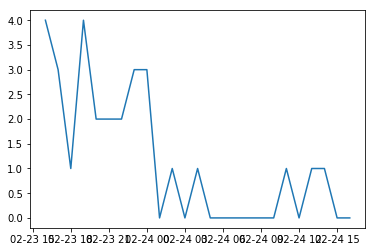

In [308]:
plt.plot(ap_df_6)